# Playstore analysis

Objective

# Tasks

# Data analysis to answer business questions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data

In [2]:
data = pd.read_csv('C:/Users/Dell/Desktop/playstore-analysis (2) (1).csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# 1.Data Cleanning – Missing value treatment

In [6]:
print(f"Missing Values :\n{data.isnull().sum()}")

Missing Values :
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [7]:
data1=data.dropna(subset=['Rating'])

In [8]:
print(f"Missing Values :\n{data1.isnull().sum()}")

Missing Values :
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64


In [9]:
print(f"Missing Values :\n{data1['Android Ver'].isnull().sum()}")

Missing Values :
3


In [10]:
data1[data1.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.000000,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.000000,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.000000,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.000000,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
data1.loc[[4453,4490,10472]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


i. Are all 3 records having the same problem?

ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [12]:
data2 = data1.drop(10472)

In [13]:
try:
    data2.loc[[10472]]
except KeyError:
    print("successfully deleted")

successfully deleted


iii. Replace remaining missing values with the mode.

In [14]:
data3 = data2.copy(deep = True)
data3['Android Ver']= data2['Android Ver'].fillna(data2['Android Ver'].mode()[0])

In [15]:
data3.loc[[4453,4490]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,4.1 and up


Missing value cells of Android ver now contains '4.1 and up'

In [16]:
data3[data3.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


Most common Value in Current ver

In [17]:
mode_cv=data3['Current Ver']. value_counts(). idxmax()
print(mode_cv)

Varies with device


In [18]:
data4 = data3.copy(deep = True)
data4[data4.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [19]:
data4['Current Ver']= data3['Current Ver'].fillna(mode_cv)

In [20]:
data4.loc[[15,1553,6322,7333]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",Varies with device,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",Varies with device,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",Varies with device,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",Varies with device,4.0 and up


# 2. Data clean up – correcting the data types

a. Which all variables need to be brought to numeric types?

In [21]:
data4.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [22]:
data5=data4.copy(deep = True)

b. Price variable – remove $ sign and convert to ﬂoat

In [23]:
data5['Price'] = data5['Price'].str.replace('$', '')

In [24]:
data5.loc[[4453,7333]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,0.99,Everyone,Puzzle,"April 18, 2018",Varies with device,4.0 and up


$ sign from price removed

In [25]:
data5['Price'] = data5['Price'].astype(float)

In [26]:
data5['Price'].dtypes

dtype('float64')

Price varieble is now a float type

c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [27]:
data5['Installs'] = data5['Installs'].str.replace('+','')
data5['Installs'] = data5['Installs'].str.replace(',', '')

In [28]:
data5.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [29]:
data5['Installs'] = data5['Installs'].astype(int)

In [30]:
data5['Installs'].dtypes

dtype('int32')

removed ‘,’ and ‘+’ sign from installs and converted to integer type

d. Convert all other identiﬁed columns to numeric

In [31]:
data5.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Reviews can be converted to numeric type

In [32]:
data5['Reviews'] = data5['Reviews'].astype(int)

In [33]:
data5['Reviews'].dtypes

dtype('int32')

In [34]:
data5.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# 3. Sanity checks – check for the following and handle accordingly

a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

i. Are there any such records? Drop if so.

In [35]:
check1=data5['Rating'] > 5

In [36]:
check1.any()

False

In [37]:
check2=data5['Rating'] < 1

In [38]:
check2.any()

False

No such records found

b. Reviews should not be more than installs as only those who installed can review the app.

i. Are there any such records? Drop if so.

In [39]:
dfcheck = pd.DataFrame()
dfcheck = data5[data5.Reviews > data5.Installs]

In [40]:
dfcheck.shape

(7, 13)

In [41]:
dfcheck.head(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


these are the 7 invalid records found

In [42]:
data6=data5.copy(deep=0)
data6.drop(data5[data5.Reviews > data5.Installs].index, inplace = True)

In [43]:
dfcheck1 = data6[data6.Reviews > data6.Installs]
dfcheck1.shape

(0, 13)

All invalid records dropped

# 4. Identify and handle outliers –

a. Price column

In [44]:
def plot_box(data,cl):
    data.boxplot(column=[cl])
    plt.grid(False)
    plt.show()

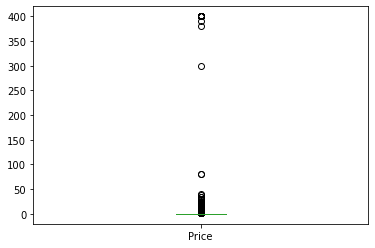

In [45]:
plot_box(data6,"Price")

Looks like there are lot of outliers

In [46]:
def outliers(data,cl):
    q1=data[cl].quantile(0.25)
    q3=data[cl].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    
    ls=data.index[(data[cl]<lower_bound) | (data[cl]>upper_bound)]
    return ls

In [47]:
indexes=outliers(data6,"Price")

In [48]:
indexes

Int64Index([  234,   235,   290,   291,   427,   476,   477,   481,   571,
              851,
            ...
            10586, 10594, 10645, 10675, 10679, 10682, 10690, 10760, 10782,
            10785],
           dtype='int64', length=644)

In [49]:
len(indexes)

644

There are 644 outliers found in Price

In [50]:
data6.loc[data6['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


Yes we can expect apps on the play store to cost $200

In [51]:
def remove(data, ls):
    ls=sorted(set(ls))
    data=data.drop(ls)
    return data

In [52]:
datacleaned=remove(data6, indexes)

In [53]:
print(data6.shape,
datacleaned.shape)

(9359, 13) (8715, 13)


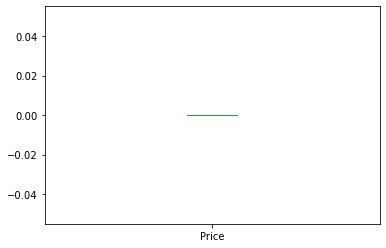

In [54]:
plot_box(datacleaned,"Price")

In [55]:
datalimit=data6[data6['Price']<30]

In [56]:
print(data6.shape,
datalimit.shape)

(9359, 13) (9338, 13)


b. Reviews column

Genres
Communication                  815461799
Social                         621241071
Casual                         412078812
Action                         350303919
Arcade                         336990376
                                 ...    
Puzzle;Education                     834
Card;Brain Games                     685
Comics;Creativity                    516
Books & Reference;Education          471
Board;Pretend Play                     4
Name: Reviews, Length: 115, dtype: int32


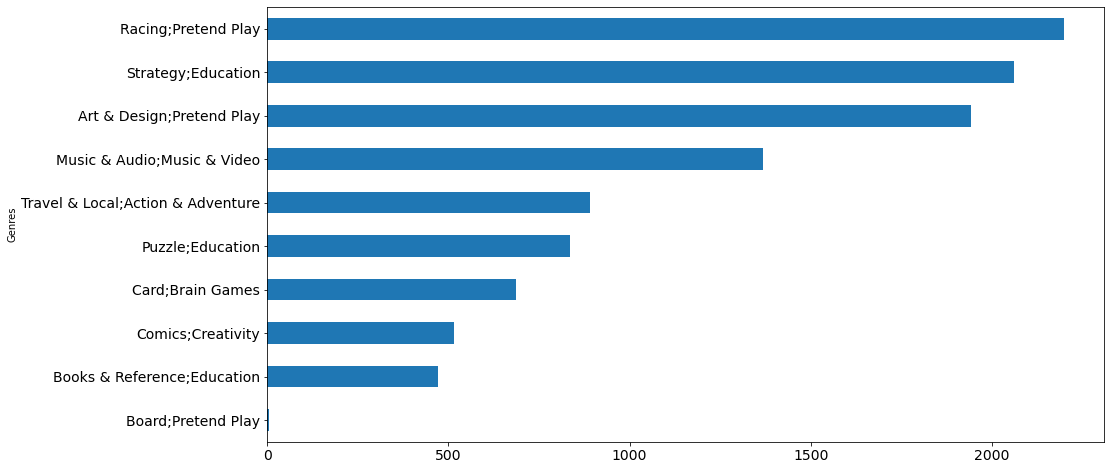

In [57]:
total=data6.groupby('Genres')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.head(10).plot(kind='barh', fontsize=14)

print(total.sort_values(ascending=False))
plt.show()

Top 10 reviewed app by Genre

In [58]:
datalim=data6[data6['Reviews']<1000000]
datalim = datalimit.sort_values(["Reviews"], ascending=False)
datalim.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,21516.529524,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,21516.529524,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


In [59]:
print(data6.shape,datalim.shape)

(9359, 13) (9338, 13)


c. Installs

In [60]:
print("95th percentile of the installs:\n",data6.Installs.quantile(0.95))

95th percentile of the installs:
 100000000.0


In [61]:
data6[data6['Reviews'] > 100000000.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are no values greater than 95th percentile

In [62]:
indices=data6[data6['Reviews'] > 100000000.0].index
data6.drop(indices, inplace = True) 

# Data analysis to answer business questions

5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

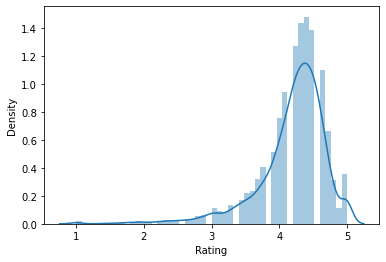

In [63]:
sns.distplot(data6['Rating'])
plt.show()

Chart shows left skewed distribution
most of the rating is in between 4 to 5.

b. What is the implication of this on your analysis?

Real life distributions are usually skewed. If there are too much skewness in the data, then many statistical model don’t work. So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance especially regression-based models. So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. This will allow us to try more number of statistical model.

Conclusion: If we have a skewed data then it may harm our results. So, in order to use a skewed data we have to apply a log transformation over the whole set of values to discover patterns in the data and make it usable for the statistical model.

#    6. What are the top Content Rating values?

In [64]:
print("top Content Rating values :\n",data6['Content Rating'].value_counts())

top Content Rating values :
 Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64


a. Are there any values with very few records?

Yes

b. If yes, drop those as they won’t help in the analysis

In [65]:
less_rated= data6[data6['Content Rating'] == 'Adults only 18+'].index.to_list()
less_rated.extend(data6[data6['Content Rating'] == 'Unrated'].index.to_list())
less_rated

[298, 3043, 6424, 8266]

In [66]:
data6.drop(less_rated, inplace = True) 

In [67]:
print("top Content Rating values :\n",data6['Content Rating'].value_counts())

top Content Rating values :
 Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64


#   7.Effect of size on rating

a.Make a joinplot to understand the effect of size on rating

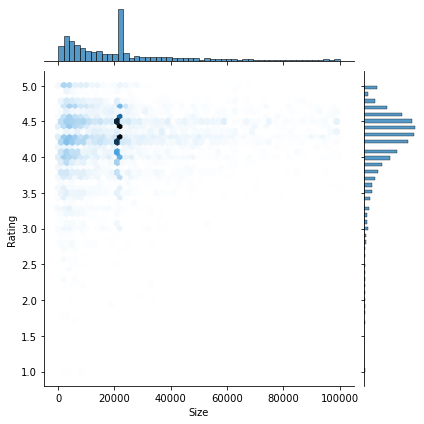

In [68]:
sns.jointplot(x=data6['Size'],y=data6['Rating'],data=data6,kind='hex')
plt.show()

b. Do you see any patterns?

The most of the data is in between Rating 3.5-5.0 and size 0-40000. and data is dense on rating 4.5 and little bellow and size of 20000

c. How do you explain the pattern?

Apps that has size of 20mb are most rated and apps with size less than 20mb are not much rated also it gets even worse after 20mb as size increases ratings decreases

#   8. Effect of price on rating

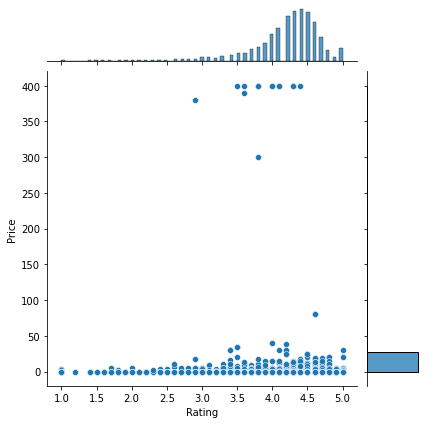

In [69]:
sns.jointplot(x ="Rating" , y = "Price" ,data = data6)
plt.show()

most rated apps are under $50

Most expensive apps don't get much rating

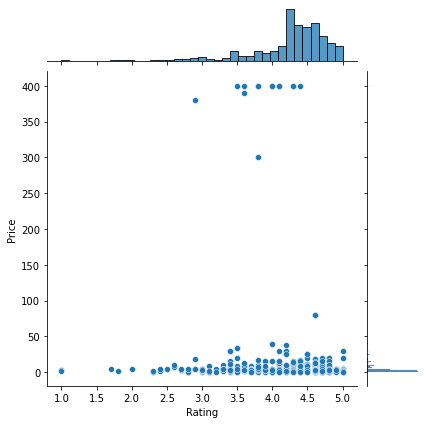

In [70]:
Price_gt_zero = data6[data6['Price'] > 0]
sns.jointplot(x ="Rating" , y = "Price" ,data = Price_gt_zero )
plt.show()

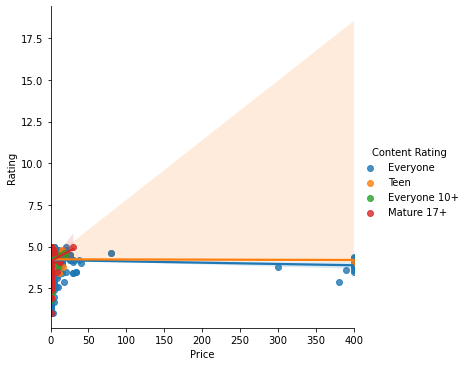

In [71]:
sns.lmplot(x='Price', y='Rating', hue ='Content Rating', data=data6)
plt.show()

A little but No significant change shown

Increasing the Prices after $50, doesn't have signifcant effect on Rating.

# 9. Look at all the numeric interactions together – 
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

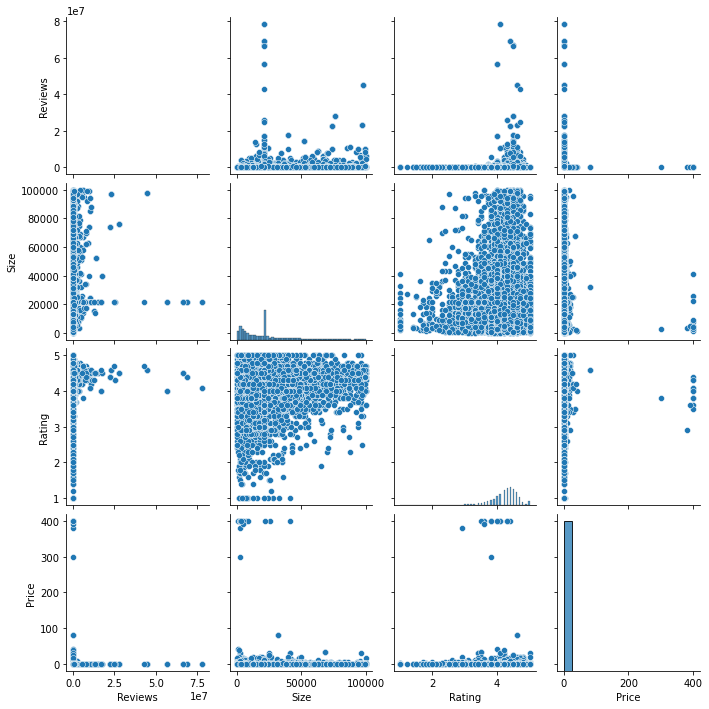

In [72]:
sns.pairplot(data6,vars=['Reviews','Size', 'Rating', 'Price'])
plt.show()


# 10. Rating vs. content rating
a. Make a bar plot displaying the rating for each content rating

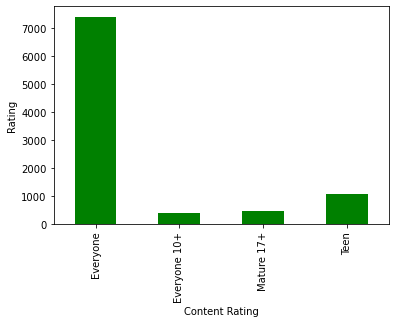

In [73]:
data6.groupby(['Content Rating'])['Rating'].count().plot.bar(color="green")
plt.ylabel('Rating')
plt.show()

b. Which metric would you use? Mean? Median? Some other quantile?

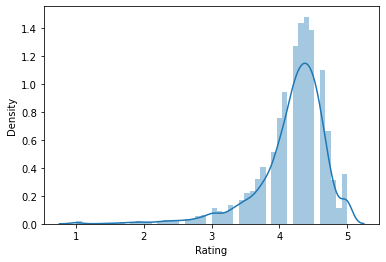

In [74]:
sns.distplot(data6['Rating'])
plt.show()

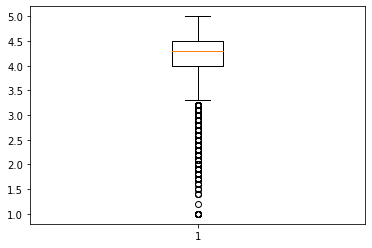

In [83]:
plt.boxplot(data6['Rating'])
plt.show()

Median
The distribution of data is left skewed and has outliers Therefore the median is better than the mean because it isn’t influenced by Outliers.

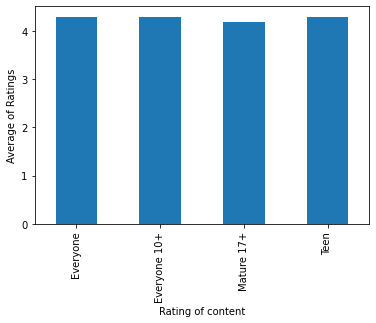

In [78]:
ax=data6['Rating'].groupby(data6['Content Rating']).median().plot(kind = 'bar')
ax.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

# 11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size

In [79]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
data6['Size_Buckets'] = pd.cut(data6['Size'], bins, labels=['0-20000','20000-40000','40000-60000','60000-80000','80000-100000'])
pd.pivot_table(data6, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
0-20000,4.148721,4.247561,4.015183,4.187047
20000-40000,4.228845,4.197802,4.195109,4.237590
40000-60000,4.192505,4.265957,4.202222,4.270896
60000-80000,4.271774,4.374000,4.190909,4.291045
80000-100000,4.280000,4.405556,4.252632,4.314815


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [80]:
Size_Buckets =pd.pivot_table(data6, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
0-20000,3.8,4.02,3.5,3.9
20000-40000,4.0,4.00,4.0,4.0
40000-60000,3.9,4.10,4.1,4.0
60000-80000,4.0,4.20,4.0,4.0
80000-100000,4.1,4.30,4.0,4.1


c. Make a heatmap of this

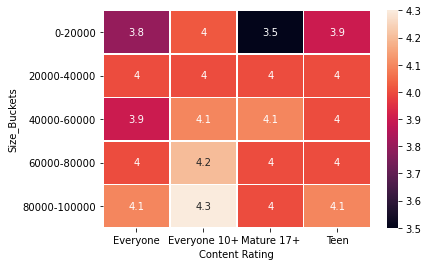

In [81]:
sns.heatmap(Size_Buckets, annot = True, linewidth=0.5)
plt.show()

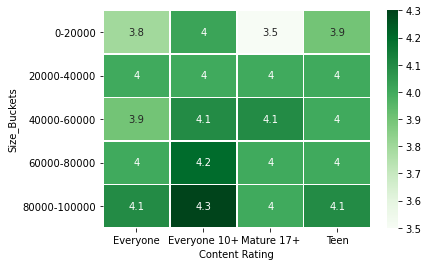

In [82]:
sns.heatmap(Size_Buckets, annot = True, linewidth=0.5,cmap='Greens')
plt.show()

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Ans(d) As we can see last two rows have 4 and more ratings and first two rows have 4 and below ratings therefore we can say that        Heavier apps preferred in all categories